In [1]:
import copy
import os
import torch
from torchinfo import summary
import pandas as pd
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split
from matplotlib.colors import LogNorm
import sklearn.preprocessing
#from directory_tree import display_tree
# Customed Library
import engine ,model_builder,utils
import numpy as np
#import torchinfo
from timeit import default_timer as timer 
import matplotlib.pyplot as plt
import random
import torch.nn.functional as F
plt.rcParams.update({'font.size': 12})
#display_tree('./')

In [8]:
def rawdataplot(Total_dataset):
    TEMP_Total_dataset=Total_dataset
    fig, axes = plt.subplots(nrows=4, ncols=1)
    TEMP_Total_dataset[Flag_col].replace({True: 1, False: 0}).plot(ax=axes[0],grid=True,title='Flag')

    TEMP_Total_dataset[For_col].plot(ax=axes[1],grid=True,title='F/T sensor(True value)')
    TEMP_Total_dataset[Input_P_col].plot(ax=axes[2],grid=True,title='Input pressure')
    TEMP_Total_dataset[TCP_col].plot(ax=axes[3],grid=True,title='TCP')
    plt.tight_layout()


    fig, axes = plt.subplots(nrows=3, ncols=1)
    TEMP_Total_dataset[right_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
    TEMP_Total_dataset[right_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
    TEMP_Total_dataset[right_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()
    fig, axes = plt.subplots(nrows=3, ncols=1)
    TEMP_Total_dataset[left_finger_pressure1].plot(ax=axes[0],legend=None,grid=True,title='Pressure Half 1')
    TEMP_Total_dataset[left_finger_pressure2].plot(ax=axes[1],legend=None,grid=True,title='Pressure Half 2')
    TEMP_Total_dataset[left_finger_strain].plot(ax=axes[2],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()

In [80]:
Columns=['Flag',
         'Force_X','Force_Y','Force_Z','Torque_X','Torque_Y','Torque_Z',
         'Input_P_1','Input_P_2',
         'TCP_X','TCP_Y','TCP_Z',
         'Sensor_P_1_1','Sensor_P_1_2','Sensor_P_1_3','Sensor_P_1_4',
         'Sensor_P_1_5','Sensor_P_1_6','Sensor_P_1_7','Sensor_P_1_8',
         'Sensor_P_1_9','Sensor_P_1_10','Sensor_P_1_11','Sensor_P_1_12',
         'Sensor_S_1',
         'Sensor_P_2_1','Sensor_P_2_2','Sensor_P_2_3','Sensor_P_2_4',
         'Sensor_P_2_5','Sensor_P_2_6','Sensor_P_2_7','Sensor_P_2_8',
         'Sensor_P_2_9','Sensor_P_2_10','Sensor_P_2_11','Sensor_P_2_12',
         'Sensor_S_2',
         'num_finger','properties','trial'
        ]
temp = pd.read_pickle("./pickle/diff_object.pkl") 
temp1 = pd.DataFrame(temp[:].values,columns=Columns)
Total_dataset=temp1

Flag_col = pd.Index(['Flag'])
For_col = pd.Index(['Force_X','Force_Y','Force_Z'])
Input_P_col = pd.Index(['Input_P_1','Input_P_2'])
TCP_col= pd.Index(['TCP_X','TCP_Y','TCP_Z'])

right_finger_pressure1 = pd.Index([ 'Sensor_P_1_1','Sensor_P_1_2',
                                  'Sensor_P_1_3','Sensor_P_1_4',
                                  'Sensor_P_1_5','Sensor_P_1_6'])

right_finger_pressure2 = pd.Index([ 'Sensor_P_1_7','Sensor_P_1_8',
                           'Sensor_P_1_9','Sensor_P_1_10',
                           'Sensor_P_1_11','Sensor_P_1_12'])
right_finger_pressure=right_finger_pressure1.append(right_finger_pressure2)
right_finger_strain = pd.Index([ 'Sensor_S_1' ])

right_finger_sensor=right_finger_pressure.append(right_finger_strain)

left_finger_pressure1 = pd.Index([ 'Sensor_P_2_1','Sensor_P_2_2',
                         'Sensor_P_2_3','Sensor_P_2_4',
                         'Sensor_P_2_5','Sensor_P_2_6'])

left_finger_pressure2 = pd.Index([ 'Sensor_P_2_7','Sensor_P_2_8',
                           'Sensor_P_2_9','Sensor_P_2_10',
                           'Sensor_P_2_11','Sensor_P_2_12'])
left_finger_pressure=left_finger_pressure1.append(left_finger_pressure2)

left_finger_strain = pd.Index([ 'Sensor_S_2' ])

left_finger_sensor=left_finger_pressure.append(left_finger_strain)


Columns.append('Time')
Total_dataset
samp_rate = 50 # hz
x_val=Total_dataset.index/samp_rate
Total_dataset['Time']=x_val

# Figure1 : Raw data plotting
- pressure and strain

In [105]:
## Calibration
# Robot signal Calibration
Cal_list_col=[For_col,TCP_col,right_finger_strain,left_finger_strain]

for i in range(len(Cal_list_col)):
    for j in range(len(Cal_list_col[i])):
        
        col_name=Cal_list_col[i][j]
        
        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0]
        
# Sensor signal
Sensor_Cal_list_col=[right_finger_pressure,left_finger_pressure]

for i in range(len(Sensor_Cal_list_col)):
    for j in range(len(Sensor_Cal_list_col[i])):
        
        col_name=Sensor_Cal_list_col[i][j]
        
        Total_dataset[col_name]=Total_dataset[col_name]-Total_dataset[col_name][0] +500*j

In [140]:
def figure_1(Total_dataset):
    
    TEMP_Total_dataset=Total_dataset
    fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(5,7))
    
    TEMP_Total_dataset.plot(x='Time',y=right_finger_pressure,xlabel='Time[s]',ylabel='Voltage[V]',ax=axes[0],legend=False,grid=True,title='Pressure',fontsize="10")
    TEMP_Total_dataset.plot(x='Time',y=right_finger_strain,xlabel='Time[s]',ylabel='Voltage[V]',ax=axes[1],grid=True,legend=None,title='Strain sensor',fontsize="10")
    
    plt.tight_layout()
    '''
    fig, axes = plt.subplots(nrows=2, ncols=1)
    TEMP_Total_dataset.plot(x='Time',y=left_finger_pressure,ax=axes[0],legend=None,grid=True,title='Pressure')
    TEMP_Total_dataset.plot(x='Time',y=left_finger_strain,ax=axes[1],grid=True,legend=None,title='Strain sensor')
    plt.tight_layout()
    '''

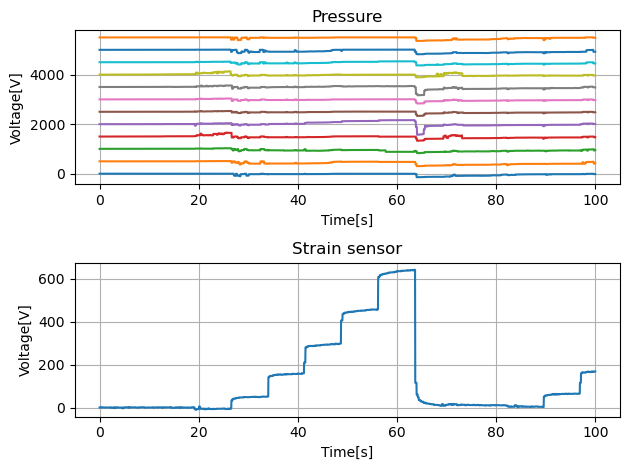

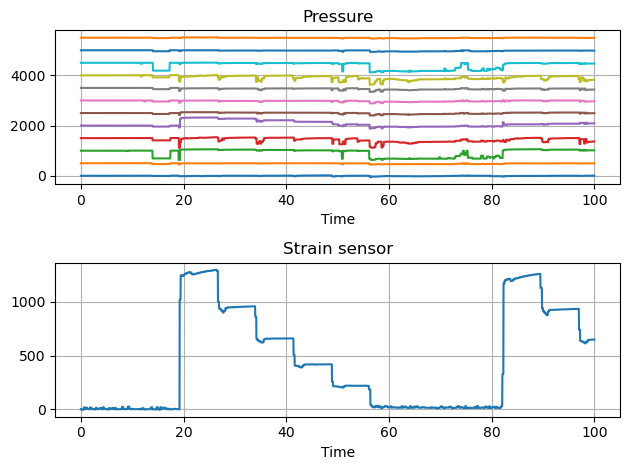

In [ ]:
#p2= pd.DataFrame(Total_dataset.query('num_finger=="sqr" and trial=="1"  and Time<"100"').values,columns=Columns)
p1=pd.DataFrame(Total_dataset.query('num_finger=="sqr" and trial=="2" ').values,columns=Columns)
p2= pd.DataFrame(p1.query('Time<100 ').values,columns=Columns)= pd.DataFrame(Total_dataset.query('
figure_1(p2)

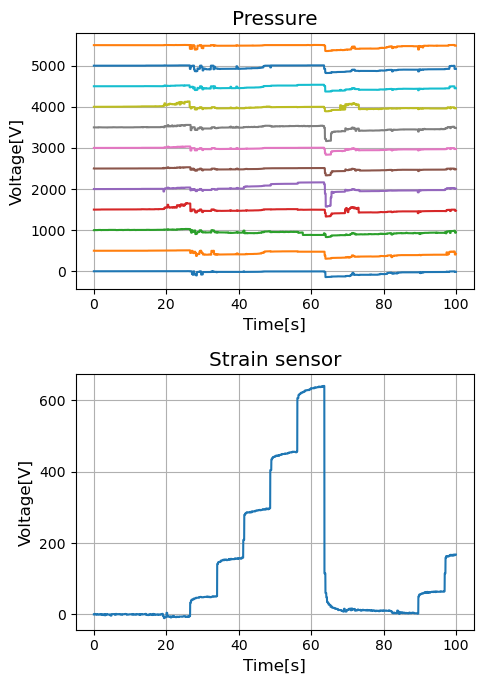

In [141]:
figure_1(p2)
plt.savefig('./paper_figure/fig1.png')

## Figure2. 